# 0 Data setup testing
**Not necessary to run for testing/eval**  
Original code written by Anderson and Botao. Preserved for documentation purposes.  
Useful to get a better understanding of what's going on in section 1., where the visualizations/etc. have all been removed for execution speed.

**Be warned** that if you run this section, it will occcupy a **lot** of memory, and you probably won't be able to run anything else in the notebook. If that happens, just restart your runtime (runtime>restart runtime).

## 0.1 Imports

In [94]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

You can check to make sure a GPU is available using the following code block.

If the below message is shown, it means you are using a CPU.
```
/bin/bash: nvidia-smi: command not found
```

---





In [95]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, 
and then re-execute this cell.


## 0.2 Data prep

Load images, perform feature extraction / refine into usable data (rather than raw RGB), split into training and test sets, apply cleaning/dimensionality reduction, etc.

## 0.2.1 Images loading from google drive
Anderson has shared the goolge drive folder which contains dataset to everyone, 
so just use that folder to run our code <br>
In your Google Drive, you need to drag that folder from "share with me" to "my drive", then you will be good to go


In [96]:
# Anderson has shared the goolge drive folder which contains dataset to everyone, so just use that folder to run our code
# In your Google Drive, you need to drag that folder from "share with me" to "my drive", then you will be good to go
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
from pathlib import Path
from PIL import Image
import tensorflow as tf
import os

# for dirname, _, filenames in os.walk('/content/drive/MyDrive'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

KeyboardInterrupt: ignored

In [ ]:
### Botao's test 
import matplotlib.pyplot as plt
import cv2 # OpenCV
import numpy as np
import os
import random
import tensorflow as tf
from tqdm import tqdm 
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D,MaxPool2D , Dropout,Flatten, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# Botao 's test
DIR1 = '/content/drive/MyDrive/archive/Decks'
DIR2 = '/content/drive/MyDrive/archive/Pavements'
DIR3 = '/content/drive/MyDrive/archive/Walls'
label = ['Non-cracked', 'Cracked']
def load_image(data_dir):
    img_data = []
    
    for word in label:
        path = os.path.join(data_dir, word)
        y_label = label.index(word)
        
        for img_name in tqdm(os.listdir(path)):
            img = cv2.imread(os.path.join(path, img_name), cv2.IMREAD_GRAYSCALE)
            #resizing = cv2.resize(img, (120,120))                               # If needed, we can resizing image to lower pixels for faster modeling test time.
            
            img_data.append([img, y_label])
            
    return np.array(img_data)


Would suggest loading folders separately, in case crushed. If there is error, reload that block again, then should be fine

In [ ]:
# Load Decks Foler
dataset_Decks = load_image(DIR1)


In [ ]:
# Load Pavements Foler
dataset_Pavements = load_image(DIR2)


In [ ]:
# Load Walls Foler
dataset_Walls = load_image(DIR3)

##0.2.2 Visulize our dataset

number of positive(1) and negative(0) 



In [ ]:
#Images = []
import seaborn as sns

def visualize_dataset (a):
    visualize = []
    for i in a:
        if(i[1] == 0):
            visualize.append("Neg")
        elif(i[1] == 1):
            visualize.append("Pos")
    
    return visualize

visualization_Decks = visualize_dataset (dataset_Decks)
visualization_Pavements = visualize_dataset (dataset_Pavements)
visualization_Walls = visualize_dataset (dataset_Walls)

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
sns.set_style('darkgrid')
axl = sns.countplot(visualization_Decks)
axl.set_title("Number of Decks Images")


In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
sns.set_style('darkgrid')
axl = sns.countplot(visualization_Pavements)
axl.set_title("Number of Pavements Images")

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
sns.set_style('darkgrid')
axl = sns.countplot(visualization_Walls)
axl.set_title("Number of Walls Images")

## 0.2.3 Visulize images


In [ ]:
# Example of how to visulize images from our dataset
# Pick dataset_Decks No.11360 image to display
#plt.figure(figsize = (12,12))
sns.set_style('white')
plt.imshow(dataset_Decks[11359][0], cmap = 'gray')

In [ ]:
dataset_Decks[11359]

In [ ]:
#test print
dataset_Decks[11359], dataset_Decks.shape

In [ ]:
# Example of how to visulize images from our dataset
# Pick dataset_Pavement No.21740 image to display
#plt.figure(figsize = (12,12))
plt.imshow(dataset_Pavements[21739][0], cmap = 'gray')

In [ ]:
#test print
dataset_Pavements[21739], dataset_Pavements.shape

## 0.2.4-1 Test: Adding noise (white edge), Leave for a while

Succeed!




In [ ]:
# Filter cracked images from dataset_Pavement for adding white edge noise test

test_1=np.where(dataset_Pavements[:,1]==1)
adding_white_edge_test=dataset_Pavements[test_1]
#adding_white_edge_test.shape, adding_white_edge_test[:,0], adding_white_edge_test[0][0]


In [ ]:
# Adding white edge to right side for all the dataset_Pavement images for testing
# Learning how to add noise
white_side_image = np.zeros((256, 20), dtype = 'uint8') + 255
adding_white_edge_dataset = []
for i in range(adding_white_edge_test.shape[0]):
    adding_white_edge_dataset.append(np.concatenate((adding_white_edge_test[:,0][i], white_side_image), axis=1))

#new_dataset

In [ ]:
adding_white_edge_dataset

In [ ]:
# Randomly pick a image from added noise dste for testing
# Succeeded!
#plt.figure(figsize = (12,12))
plt.imshow(adding_white_edge_dataset[3], cmap = 'gray')

In [ ]:
adding_white_edge_dataset[3].shape

In [ ]:
# testing for resizing
resize_test = cv2.resize(adding_white_edge_dataset[3], (256,256))
plt.imshow(resize_test, cmap = 'gray')

In [ ]:
resize_test.shape

## 0.2.4-2 Test: Adding noise (flip image), Leave for a while
Succeed!

In [ ]:
# Learn how to flip images
# Filter cracked images from dataset_Pavement for adding Flip noise test

flip_test=dataset_Pavements[test_1]
#flip_test.shape, flip_test[:,0], flip_test[0][0]

In [ ]:
# Flip cracked images for all the dataset_Pavement images for testing
# Learning how to flip image

flip_dataset = []
for i in range(flip_test.shape[0]):
  flip_dataset.append(np.flip(flip_test[:,0][i])) 

#white_side_image = np.zeros((256, 20), dtype = 'uint8') + 255
#adding_white_edge_dataset = []
#for i in range(adding_white_edge_test.shape[0]):
    #adding_white_edge_dataset.append(np.concatenate((adding_white_edge_test[:,0][i], white_side_image), axis=1))

In [ ]:
# Randomly pick a image from fliped dataset for testing
# Succeeded!
#plt.figure(figsize = (12,12))
plt.imshow(flip_dataset[3], cmap = 'gray')

## 0.2.4-3 Test: Adding noise (blurring image), Leave for a while
Succeed!

In [ ]:
# Blur images
# we can use different kernel values to blur the image
def blurring(a):
    kernel = np.array([[0.1,0.1,0.1], [0.1,0.1,0.1], [0.1,0.1,0.1]])
    #kernel = np.array([[0.125,0.125,0.125], [0.125,0.25,0.125], [0.125,0.125,0.125]])
    #kernel = np.array([[1.0,2.0,1.0], [2.0,4.0,2.0], [1.0,2.0,1.0]])
    kernel = kernel / np.sum(kernel)
    arraylist = []
    for y in range(3):
        temparray = np.copy(a)
        temparray = np.roll(temparray, y - 1, axis=0)
        for x in range(3):
            temparray_X = np.copy(temparray)
            temparray_X = np.roll(temparray_X, x - 1, axis=1)*kernel[y,x]
            arraylist.append(temparray_X)

    arraylist = np.array(arraylist)
    arraylist_sum = np.sum(arraylist, axis=0)
    return arraylist_sum

In [ ]:
# Succeed!
blurring_image = blurring(dataset_Pavements[21739][0])
plt.figure(figsize = (6,6))
plt.imshow(blurring_image, cmap = 'gray')


In [ ]:
# print original image for blurred comparision
plt.figure(figsize = (6,6))
# original image
plt.imshow(dataset_Pavements[21739][0], cmap = 'gray')

##0.2.4 Define adding noise functions (White edge, Flip, Blur)

white_edge(),
flip(),
blur()

In [ ]:
def white_edge(a):
    distance = 20   # white edge distance that we want to add
    add_white_side_size = np.zeros((256, distance), dtype = 'uint8') + 255 
    added = np.concatenate((a, add_white_side_size), axis=1)
    resized = cv2.resize(added, (256,256)) 

    return resized

def flip_1(b):
    flipped = np.flip(b) 

    return flipped

def flip_2(b):
    flipped = np.flip(b, axis = 0) 

    return flipped

def flip_3(b):
    flipped = np.flip(b, axis = 1) 

    return flipped

def rotate_1(d):
    rotated = np.rot90(d)

    return rotated

def rotate_2(d):
    rotated = np.rot90(d,3)

    return rotated


def blur(c):
    kernel = np.array([[0.1,0.1,0.1], [0.1,0.1,0.1], [0.1,0.1,0.1]]) # we can use different kernel values to blur the image
    #kernel = np.array([[0.125,0.125,0.125], [0.125,0.25,0.125], [0.125,0.125,0.125]])
    #kernel = np.array([[1.0,2.0,1.0], [2.0,4.0,2.0], [1.0,2.0,1.0]])
    kernel = kernel / np.sum(kernel)
    arraylist = []
    for y in range(3):
        temparray = np.copy(c)
        temparray = np.roll(temparray, y - 1, axis=0)
        for x in range(3):
            temparray_X = np.copy(temparray)
            temparray_X = np.roll(temparray_X, x - 1, axis=1)*kernel[y,x]
            arraylist.append(temparray_X)

    arraylist = np.array(arraylist)
    arraylist_sum = np.sum(arraylist, axis=0)
    return arraylist_sum

In [ ]:
# Initial Image
plt.imshow(dataset_Pavements[21739][0], cmap = 'gray')

In [ ]:
f = rotate_1(dataset_Pavements[21739][0])
plt.imshow(f, cmap = 'gray')

In [ ]:
f = rotate_2(dataset_Pavements[21739][0])
plt.imshow(f, cmap = 'gray')

In [ ]:
a = white_edge(dataset_Pavements[21739][0])
plt.imshow(a, cmap = 'gray')

In [ ]:
b = flip_1(dataset_Pavements[21739][0])
plt.imshow(b, cmap = 'gray')

In [ ]:
c = flip_2(dataset_Pavements[21739][0])
plt.imshow(c, cmap = 'gray')

In [ ]:
d = flip_3(dataset_Pavements[21739][0])
plt.imshow(d, cmap = 'gray')

In [ ]:
e = blur(dataset_Pavements[21739][0])
plt.imshow(e, cmap = 'gray')

##0.2.5 Generate Noise Dataset
Randomly pick images from dataset to add noise.<br>
5% of dataset are used for adding white edge，<br>
5% of dataset are used for flipping,<br>
10% of dataset are used for blurring.

In [ ]:
import random

#dataset_Decks_list = dataset_Decks.tolist()

def random_select(dataset, percent):
    num = round(percent*dataset.shape[0])
    random_images = random.choices(dataset, k=num)

    return np.array(random_images)


In [ ]:
def add_noise_processing(dataset, filter, percent):
    percent = percent
    dataset = dataset
    process_image = random_select(dataset, percent)
    #new_dataset
    for i in range(process_image.shape[0]):
        process_image[i][0] = filter(process_image[i][0])

    return np.array(process_image)

In [ ]:
percent_1 = 0.05
percent_2 = 0.1

Decks_addwhite_set = add_noise_processing(dataset_Decks, white_edge, percent_1)
Decks_flip_set = add_noise_processing(dataset_Decks, flip, percent_1)
Decks_blur_set = add_noise_processing(dataset_Decks, blur, percent_2)

Pavements_addwhite_set = add_noise_processing(dataset_Pavements, white_edge, percent_1)
Pavements_flip_set = add_noise_processing(dataset_Pavements, flip, percent_1)
Pavements_blur_set = add_noise_processing(dataset_Pavements, blur, percent_2)

Walls_addwhite_set = add_noise_processing(dataset_Walls, white_edge, percent_1)
Walls_flip_set = add_noise_processing(dataset_Walls, flip, percent_1)
Walls_blur_set = add_noise_processing(dataset_Walls, blur, percent_2)


In [ ]:
Decks_addwhite_set.shape, Decks_flip_set.shape, Decks_blur_set.shape

In [ ]:
Pavements_addwhite_set.shape, Pavements_flip_set.shape,Pavements_blur_set.shape

In [ ]:
Walls_addwhite_set.shape, Walls_flip_set.shape,Walls_blur_set.shape

**Prviding 3 added-noise dataset for Decks, Pavement, and Walls.**

In [ ]:
# Prviding 3 added-noise dataset for Decks, Pavement, and Walls.
Decks_noise_dataset = np.concatenate((Decks_addwhite_set, Decks_flip_set,Decks_blur_set), axis=0)
Pavements_noise_dataset = np.concatenate((Pavements_addwhite_set, Pavements_flip_set,Pavements_blur_set), axis=0)
Walls_noise_dataset = np.concatenate((Walls_addwhite_set, Walls_flip_set,Walls_blur_set), axis=0)

In [ ]:
#Tesing
#succeed
plt.imshow(Pavements_noise_dataset[1200][0], cmap = 'gray')

In [ ]:
visualization_Decks_noise_dataset = visualize_dataset(Decks_noise_dataset)
print(len(visualization_Decks_noise_dataset))
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
sns.set_style('darkgrid')
axl = sns.countplot(visualization_Decks_noise_dataset, order=['Neg', 'Pos'])
axl.set_title("Number of Decks Noise Images")

In [ ]:
visualization_Pavements_noise_dataset = visualize_dataset(Pavements_noise_dataset)
print(len(visualization_Pavements_noise_dataset))
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
sns.set_style('darkgrid')
axl = sns.countplot(visualization_Pavements_noise_dataset)
axl.set_title("Number of Pavements Noise Images")

In [ ]:
visualization_Walls_noise_dataset = visualize_dataset(Walls_noise_dataset)
print(len(visualization_Walls_noise_dataset))
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
sns.set_style('darkgrid')
axl = sns.countplot(visualization_Walls_noise_dataset)
axl.set_title("Number of Walls Noise Images")

##0.2.6 Prepare Dataset for training and testing

 After combine Noise_set with Normal_set.
 Generate 80% dataset for training; 20% dataset for testing。
 Shuffle training set and test set.




In [ ]:
def separete_dataset(normal_dataset, noise_dataset):
    all_set = np.concatenate((normal_dataset, noise_dataset), axis=0)
    print("all_dataset shape:")
    print(all_set.shape)
    np.random.shuffle(all_set)
    percent = 0.8
    row_number = round(percent*all_set.shape[0])

    training_set = all_set[0:row_number,:]
    testing_set = all_set[row_number:,:]
    return training_set, testing_set


In [ ]:
visualization_training_dataset = visualize_dataset(Decks_training_set)
print(len(visualization_Decks_noise_dataset))
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
sns.set_style('darkgrid')
axl = sns.countplot(visualization_Decks_noise_dataset, order=['Neg', 'Pos'])
axl.set_title("Number of Decks Noise Images")

In [ ]:
Decks_training_dataset, Decks_testing_dataset = separete_dataset(dataset_Decks, Decks_noise_dataset)

Decks_training_dataset.shape, Decks_testing_dataset.shape

In [ ]:
Pavements_training_dataset, Pavements_testing_dataset = separete_dataset(dataset_Pavements, Pavements_noise_dataset)

Pavements_training_dataset.shape, Pavements_testing_dataset.shape

In [ ]:
Walls_training_dataset, Walls_testing_dataset = separete_dataset(dataset_Walls, Walls_noise_dataset)

Walls_training_dataset.shape, Walls_testing_dataset.shape

In [ ]:
sns.set_style('white')
plt.imshow(Walls_training_dataset[1200][0], cmap = 'gray')

##0.2.7 Notes about Datasets


*   Three major datasets (Decks, Pavements, Walls) have been **added with noise images** (5% adding white edge, 5% flipping, 10% blurring) without replacing original images.
*   Three major datasets (Decks, Pavements, Walls) **are shuffled**. 
*   Each set is separated as **80% tranning set and 20% testing set** for our model


1.   *   Decks_training_dataset
     *   Decks_testing_dataset
2.   *   Pavements_training_dataset
     *   Pavements_testing_dataset
3.   *   Walls_training_dataset
     *   Walls_testing_dataset

*   Each dataset is a **[Nx2] array**, N is the number of datapoints for each set.
*   The first column of array contain images array with the **same size (256 x 256)**
*   The second column of array contain **0 (negative)** or **1 (positive)** as Ground Truth










## 0.3 Dataset mutations (apply flips)

# 1 Setup
New version of code originally written by Botao and Anderson in section 0. Refactored to avoid memory leak and make the clicking simpler.  
**Run this entire section** to import all the packages needed and to declare/define vital data-preparation functions.

## 1.1 Imports

In [542]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [543]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

You can check to make sure a GPU is available using the following code block.

If the below message is shown, it means you are using a CPU.
```
/bin/bash: nvidia-smi: command not found
```

---





In [544]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, 
and then re-execute this cell.


Anderson has shared the google drive folder which contains dataset to everyone, so just use that folder to run our code
In your Google Drive, you need to drag that folder from "share with me" to "my drive", then you will be good to go

In [545]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [546]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
from pathlib import Path
from PIL import Image
import seaborn as sns

In [547]:
import matplotlib.pyplot as plt
import cv2 # OpenCV
import random
from tqdm import tqdm 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from skimage import feature

In [548]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.metrics.cluster import contingency_matrix

How many of these imports are we actually using?

## 1.2 Define data prep functions

### 1.2.1 Data loading
load_image(data_dir)

In [549]:
def load_image(data_dir):
    label = ['Non-cracked', 'Cracked']
    img_data = []
    
    for word in label:
        path = os.path.join(data_dir, word)
        y_label = label.index(word)
        
        for img_name in tqdm(os.listdir(path)):
            img = cv2.imread(os.path.join(path, img_name), cv2.IMREAD_GRAYSCALE)
            # resized_img = cv2.resize(img, (64,64))                               # If needed, we can resizing image to lower pixels for faster modeling test time.
            #                                                                       update: actually, resizing here won't work because of the way white_edge is coded.
            
            img_data.append([img, y_label])
            
    return np.array(img_data)

### NEW 1.2.2 Define flip and rotate methods for increasing the number of craked images preparation
flip_1(data), flip_2(data), rotate_1(data), rotate_2(data)


Why do we increase the number of craked images? Since our orgianl dataset contains really unbalanced number of cracked images and uncrakced images. We decided to use 3 flips and 2 rotates to increase cracked image 5 more times (plus orginal set would be 6-times number in total), which make the overall dataset balanced relatively.

In [550]:
def flip_1(data):
    flipped = np.flip(data) 

    return flipped

def flip_2(data):
    flipped = np.flip(data, axis = 0) 

    return flipped

###### flip_3 was moved to later step for unsupervised learnning######
'''
def flip_3(data):
    flipped = np.flip(data, axis = 1) 

    return flipped
'''

def rotate_1(data):
    rotated = np.rot90(data)

    return rotated

def rotate_2(data):
    rotated = np.rot90(data,3)

    return rotated

### 1.2.2 Add noise
white_edge(data), flip(data), blur(data)

Why do we add noise? To make the model more robust (able to filter out noise in data). 

In [551]:
def white_edge(data):
    distance = 20   # white edge distance that we want to add
    add_white_side_size = np.zeros((256, distance), dtype = 'uint8') + 255 
    added = np.concatenate((data, add_white_side_size), axis=1)
    resized = cv2.resize(added, (256,256)) 

    return resized

In [552]:
def flip(data):
    flipped = np.flip(data) 

    return flipped

In [553]:
def blur(data):
    kernel = np.array([[0.1,0.1,0.1], [0.1,0.1,0.1], [0.1,0.1,0.1]]) # we can use different kernel values to blur the image
    #kernel = np.array([[0.125,0.125,0.125], [0.125,0.25,0.125], [0.125,0.125,0.125]])
    #kernel = np.array([[1.0,2.0,1.0], [2.0,4.0,2.0], [1.0,2.0,1.0]])
    kernel = kernel / np.sum(kernel)
    arraylist = []
    for y in range(3):
        temparray = np.copy(data)
        temparray = np.roll(temparray, y - 1, axis=0)
        for x in range(3):
            temparray_X = np.copy(temparray)
            temparray_X = np.roll(temparray_X, x - 1, axis=1)*kernel[y,x]
            arraylist.append(temparray_X)

    arraylist = np.array(arraylist)
    arraylist_sum = np.sum(arraylist, axis=0)
    return arraylist_sum

### 1.2.3 Feature selection

Trying PCA

In [554]:
def flatten_data(dataset):
    data = []
    for img, label in dataset:
       data.append([np.ndarray.flatten(img), label])
    return np.array(data)

In [555]:
def flatten_and_split_data(dataset):
    data = []
    labels = []
    for img, label in dataset:
       data.append(np.ndarray.flatten(img))
       labels.append(label)
    return np.array(data), np.array(labels)

In [556]:
def get_pca_data(X, k=24):
    X, y = flatten_and_split_data(X)
    pca = PCA(n_components=k)
    X = pca.fit_transform(X)
    print("Explained variance ratio:")
    print(pca.explained_variance_ratio_)
    data = []
    for i in range(X.shape[0]):
        data.append([X[i], y[i]])
    return np.array(data)

split because of RAM issues

In [557]:
# def pca_step_get_v(X, k):
#     X = flatten_data(X)
#     u, s, v = np.linalg.svd(X - np.average(X, axis=0), full_matrices=False, compute_uv=True)
#     return np.transpose(v)[:, :k]

In [558]:
# def pca(X, k=24):
#     v = pca_step_get_v(X, k)
#     return np.matmul(X - np.average(X, axis=0), v)

### NEW 1.2.4 Data mutation
increase_set(dataset,filter),
processing_increase_set(cracked_dataset)

The actual process of incresing 5-times number of cracked images

Commented code was the original. Effects were preserved but moved into functions to save RAM

In [559]:
def increase_set(dataset,filter):
    process_set = dataset
    for i in range(process_set.shape[0]):
        process_set[i][0] = filter(process_set[i][0])

    return np.array(process_set)

In [560]:
def processing_increase_set(cracked_dataset):
    original_set = cracked_dataset
    filters = [flip_1, flip_2, rotate_1, rotate_2]
    for i in filters:
        new_set = increase_set(cracked_dataset,i)
        original_set = np.concatenate((original_set,new_set), axis=0)

    return original_set

In [561]:
def split_by_label(dataset):
    positive_mask = np.where(dataset[:,1]==1)
    negative_mask = np.where(dataset[:,1]==0)
    print(len(dataset[positive_mask]), len(dataset[negative_mask]))
    return dataset[positive_mask], dataset[negative_mask]

In [562]:
# #filter out cracked images from dataset_Pavements
# test_1=np.where(dataset_Pavements[:,1]==1)
# cracked_Pavements=dataset_Pavements[test_1]

# #filter out cracked images from dataset_Decks
# test_2=np.where(dataset_Decks[:,1]==1)
# cracked_Decks=dataset_Decks[test_2]

# #filter out cracked images from dataset_Walls
# test_3=np.where(dataset_Walls[:,1]==1)
# cracked_Walls=dataset_Walls[test_3]

# #increase numbers of cracked images - Pavements
# final_cracked_Pavements = processing_increase_set(cracked_Pavements)
# #increase numbers of cracked images - Decks
# final_cracked_Decks = processing_increase_set(cracked_Decks)
# #increase numbers of cracked images - Walls
# final_cracked_Walls = processing_increase_set(cracked_Walls)


In [563]:
# # obtain whole dataset
# # Pavement
# uncracked_index=np.where(dataset_Pavements[:,1]==0)
# uncracked_Pavements=dataset_Pavements[uncracked_index]
# #print(uncracked_Pavements)
# #print(final_cracked_Pavements)
# final_Pav=np.concatenate((uncracked_Pavements, final_cracked_Pavements),axis=0)

# # obtain whole dataset
# # Decks
# uncracked_index=np.where(dataset_Decks[:,1]==0)
# uncracked_Decks=dataset_Decks[uncracked_index]
# #print(uncracked_Pavements)
# #print(final_cracked_Pavements)
# final_Dec=np.concatenate((uncracked_Decks, final_cracked_Decks),axis=0)

# # obtain whole dataset
# # Walls
# uncracked_index=np.where(dataset_Walls[:,1]==0)
# uncracked_Walls=dataset_Walls[uncracked_index]
# #print(uncracked_Pavements)
# #print(final_cracked_Pavements)
# final_Walls=np.concatenate((uncracked_Walls, final_cracked_Walls),axis=0)


In [564]:
# vis_Pav = visualize_dataset(final_Pav)
# print(len(vis_Pav))
# plt.figure(figsize=(10,10))
# plt.subplot(2, 2, 1)
# sns.set_style('darkgrid')
# axl = sns.countplot(vis_Pav)
# axl.set_title("Number of Pavement Images")

In [565]:
# vis_Decks = visualize_dataset(final_Dec)
# print(len(vis_Decks ))
# plt.figure(figsize=(10,10))
# plt.subplot(2, 2, 1)
# sns.set_style('darkgrid')
# axl = sns.countplot(vis_Decks )
# axl.set_title("Number of Deck Images")

In [566]:
# vis_Walls = visualize_dataset(final_Walls)
# print(len(vis_Walls))
# plt.figure(figsize=(10,10))
# plt.subplot(2, 2, 1)
# sns.set_style('darkgrid')
# axl = sns.countplot(vis_Walls)
# axl.set_title("Number of Wall Images")

### 1.2.4 Data mutation
random_select(dataset, percent),  
add_noise_processing(dataset, filter, percent),  
make_noise_sets(dataset, percents),  
make_full_noise_set(dataset, percents)

Apply the noise functions from 1.2.2

In [567]:
def random_select(dataset, percent):
    num = round(percent*dataset.shape[0])
    random_images = random.choices(dataset, k=num)

    return np.array(random_images)

In [568]:
# def add_noise_processing(dataset, filter, percent):
#     process_image = random_select(dataset, percent)
#     #new_dataset
#     for i in range(process_image.shape[0]):
#         process_image[i][0] = filter(process_image[i][0])

#     return np.array(process_image)

In [569]:
# def make_noise_sets(dataset, percents=(0.05, 0.05, 0.10)):
#     data_white_set = add_noise_processing(dataset, white_edge, percents[0])
#     data_flip_set = add_noise_processing(dataset_Decks, flip, percents[1])
#     data_blur_set = add_noise_processing(dataset_Decks, blur, percents[2])
#     return (data_white_set, data_flip_set, data_blur_set)

In [570]:
# def make_full_noise_set(dataset, percents=(0.05, 0.05, 0.10)):
#     return np.concatenate(make_noise_sets(dataset, percents), axis=0)

### 1.2.5 Resize dataset and split into train/val
combine_dataset(normal_dataset, noise_dataset),  
resize_dataset(dataset, size),  
split_dataset(dataset, training_percent),  
full_data_prep(dataset, noise_percents, training_percent, image_size)


Combine Noise_set with Normal_set.  
Generate 80% dataset for training; 20% dataset for testing.  
Shuffle training set and test set.

In [571]:
def combine_dataset(normal_dataset, noise_dataset):
    return np.concatenate((normal_dataset, noise_dataset), axis=0)

In [572]:
def resize_dataset(dataset, size=256):
    resized_images = []
    for img, label in dataset:
      resized_img = cv2.resize(img, (size, size))    
      resized_images.append([resized_img, label])
    return np.array(resized_images)

In [573]:
def split_dataset(dataset, training_percent=0.8):
    dataset_copy = np.copy(dataset)
    np.random.shuffle(dataset_copy)
    row_number = round(training_percent*dataset_copy.shape[0])

    training_set = dataset_copy[0:row_number,:]
    testing_set = dataset_copy[row_number:,:]
    return training_set, testing_set

In [574]:
# def full_data_prep(dataset, noise_percents=(0.05, 0.05, 0.10), training_percent=0.8, image_size=256):
#     noise_dataset = make_full_noise_set(dataset, noise_percents)
#     combined_dataset = combine_dataset(dataset, noise_dataset)
#     resized_dataset = resize_dataset(combined_dataset, image_size)
#     training_data, testing_data = split_dataset(resized_dataset, training_percent)
#     return training_data, testing_data

### 1.2.6 Notes about Datasets

*   Three major datasets (Decks, Pavements, Walls) have been **added with noise images** (5% adding white edge, 5% flipping, 10% blurring) without replacing original images.
*   Three major datasets (Decks, Pavements, Walls) **are shuffled**. 
*   Each set is separated as **80% tranning set and 20% testing set** for our model


1.   *   Decks_training_dataset
     *   Decks_testing_dataset
2.   *   Pavements_training_dataset
     *   Pavements_testing_dataset
3.   *   Walls_training_dataset
     *   Walls_testing_dataset

*   Each dataset is a **[Nx2] array**, N is the number of datapoints for each set.
*   The first column of array contain images array with the **same size (256 x 256)**
*   The second column of array contain **0 (negative)** or **1 (positive)** as Ground Truth

### 1.2.7 Updated data processing functions

In [575]:
def apply_edge_detection(image, sigma=1.5):
    edges = feature.canny(image, sigma)
    return edges

In [576]:
def make_edge_dataset(dataset, sigma=1.5):
    edge_images = []
    for image, label in dataset:
      edge_image = apply_edge_detection(image, sigma)    
      edge_images.append([edge_image, label])
    return np.array(edge_images)

In [577]:
# Returns a balanced dataset with 50% of each class
# by randomly sampling from the original dataset and
# applying flips to the cracked data, then
# dumping images if greater than the desired size (should be)
def balance_data(dataset, size=20000):
    positive_set, negative_set = split_by_label(dataset)
    new_pos_set = processing_increase_set(positive_set)
    new_pos_set = combine_dataset(positive_set, new_pos_set)

    desired_size_per_label = size/2
    pos_size = len(new_pos_set)
    neg_size = len(negative_set)
    pos_percent = desired_size_per_label / pos_size
    assert pos_percent <= 1
    neg_percent = desired_size_per_label / neg_size
    assert neg_percent <= 1

    new_pos_set = random_select(new_pos_set, pos_percent)
    new_neg_set = random_select(negative_set, neg_percent)
    assert len(new_pos_set) == len(new_neg_set)

    print("%d positive samples, %d negative samples" %(len(new_pos_set), len(new_neg_set)))

    return combine_dataset(new_pos_set, new_neg_set)

In [578]:
# Given the raw dataset:
# 1. scale images down
# 2. apply canny edge detection
# 3. balance numbers of each class
# 4a. apply pca to get new features OR
# 4b. flatten image data into one array
# 5. split into train + test
def full_prep_suite(dataset, dataset_size=20000, img_size=256, train_percent=0.80, pca_k=8, sigma=1.5, use_pca=True):
    print("Resizing images to %d x %d..." % (img_size, img_size))
    dataset = resize_dataset(dataset, img_size)
    print("Making edge images with sigma = %.1f..." % sigma)
    dataset = make_edge_dataset(dataset)
    print("Balancing set to %d..." % dataset_size)
    dataset = balance_data(dataset, dataset_size)
    if use_pca:
        print("Applying pca with %d components..." % pca_k)
        dataset = get_pca_data(dataset, pca_k)
    else:
        print("Flattening data...")
        dataset = flatten_data(dataset)
    print("Splitting data into %.1f%% training, %.1f%% testing..." % (train_percent * 100, (1 - train_percent) * 100))
    train_data, test_data = split_dataset(dataset, train_percent)
    return train_data, test_data

# 2 Data
Execute functions defined in 1 to properly load the data.  
This will take some time.
(Should we consider using pandas dataframes to speed up the data loading step?)

## 2.1 Load and prepare data
Call the functions defined in 1.  
Currently, you should just load the **Decks** data while testing.

In [579]:
DIR1 = '/content/drive/MyDrive/archive/Decks'
dataset_Decks = load_image(DIR1)

100%|██████████| 2025/2025 [00:09<00:00, 208.94it/s]
<ipython-input-549-bc38c52b9269>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(img_data)


In [580]:
# DIR2 = '/content/drive/MyDrive/archive/Pavements'
# dataset_Pavements = load_image(DIR2)

In [581]:
# DIR3 = '/content/drive/MyDrive/archive/Walls'
# dataset_Walls = load_image(DIR3)

In [582]:
# these are optional parameters for this method which can be played around with
dataset_size = 20000
img_size = 64
train_percent = 0.80
pca_k = 5
sigma = 1.0
use_pca = False

In [583]:
training_data, val_data = full_prep_suite(dataset_Decks, dataset_size, img_size, train_percent, pca_k, sigma, use_pca)

Resizing images to 64 x 64...


<ipython-input-572-0c064896ec56>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(resized_images)


Making edge images with sigma = 1.0...
Balancing set to 20000...
2025 11358
10000 positive samples, 10000 negative samples
Flattening data...
Splitting data into 80.0% training, 20.0% testing...


<ipython-input-554-91c03b660c74>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [584]:
def visualize_deck_pca_data():
    dataset, _ = full_prep_suite(dataset_Decks, dataset_size=20000, img_size=64, train_percent=1.0, pca_k=2, sigma=1.0)
    fig = plt.figure()
    plt.title('Visualization of Deck training dataset with 2 pca components')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

    pos, neg = split_by_label(dataset)
    pos_x = []
    pos_y = []
    for sample in pos:
        pos_x.append(sample[0][0])
        pos_y.append(sample[0][1])
          
    neg_x = []
    neg_y = []
    for sample in neg:
        neg_x.append(sample[0][0])
        neg_y.append(sample[0][1])

        
    plt.scatter(pos_x, pos_y, c='blue', label="Cracked", marker="x")

    plt.scatter(neg_x, neg_y, c='red', label="Uncracked", marker="x")
    plt.legend()
    plt.show()

In [585]:
def test_edge_detection(image):
    # sample code taken from https://scikit-image.org/docs/stable/auto_examples/edges/plot_canny.html
    edges1 = feature.canny(image, sigma=1)
    edges2 = feature.canny(image, sigma=2)

    # display results
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('original image', fontsize=20)

    ax[1].imshow(edges1, cmap='gray')
    ax[1].set_title(r'Canny filter, $\sigma=1$', fontsize=20)

    ax[2].imshow(edges2, cmap='gray')
    ax[2].set_title(r'Canny filter, $\sigma=2$', fontsize=20)

    for a in ax:
        a.axis('off')

    fig.tight_layout()
    plt.show()

Resizing images to 64 x 64...


<ipython-input-572-0c064896ec56>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(resized_images)


Making edge images with sigma = 1.0...
Balancing set to 20000...
2025 11358
10000 positive samples, 10000 negative samples
Applying pca with 2 components...
Explained variance ratio:
[0.06124203 0.01324471]


<ipython-input-556-8640eb67d26f>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


Splitting data into 100.0% training, 0.0% testing...
10000 10000


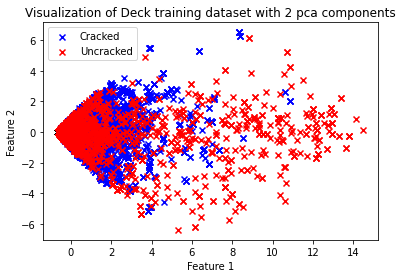

In [586]:
visualize_deck_pca_data()

2025 11358


<ipython-input-572-0c064896ec56>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(resized_images)


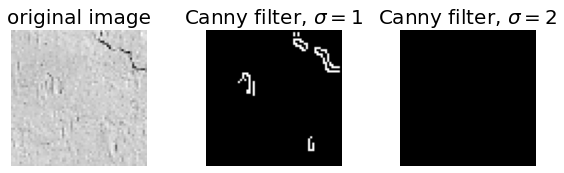

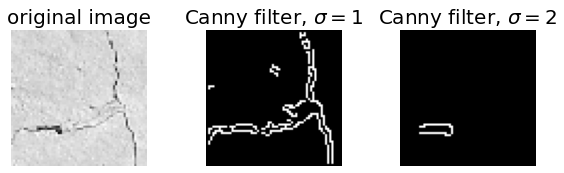

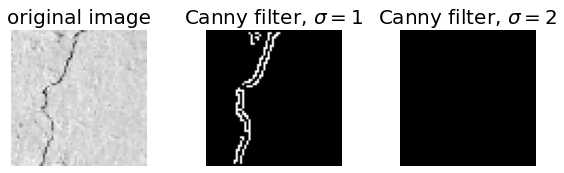

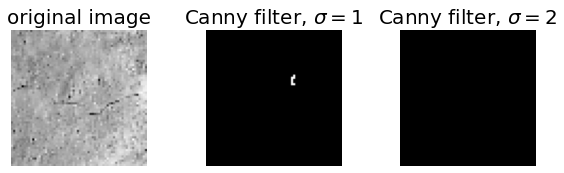

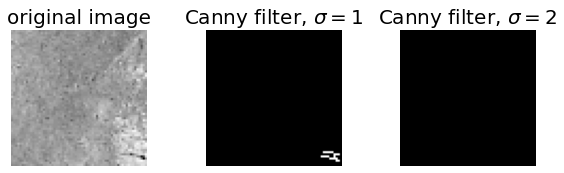

In [587]:
cracked_samples, _ = split_by_label(dataset_Decks)
cracked_samples = resize_dataset(cracked_samples, 64)
for i in range(5):
    test_edge_detection(cracked_samples[random.randint(0,2000)][0])

In [588]:
cracked_samples = None # clear ram

# 3 Model

## 3.1 Model setup
Define hyperparameters, model architecture

In [589]:
INPUT_DIM = pca_k
if not use_pca:
    INPUT_DIM = img_size ** 2
BUFFER_DIM = 20
HIDDEN_DIM = 12
OUTPUT_DIM = 1
LEARNING_RATE = 0.0001
EPOCHS = 5
HIDDEN_LAYERS = 3
ALPHA = 0.01

In [590]:
class CrackDetectionModel(nn.Module):
    def __init__(self, input_dim, buffer_dim, hidden_dim, output_dim, hidden_layers, alpha):
        super(CrackDetectionModel, self).__init__()

        self.hidden_lls = []
        self.input_ll = nn.Linear(input_dim, buffer_dim)
        self.buffer_ll = nn.Linear(buffer_dim, hidden_dim)
        self.leaky_relu = nn.LeakyReLU(alpha)

        for i in range(hidden_layers):
            hidden_ll = nn.Linear(hidden_dim, hidden_dim)
            self.hidden_lls.append(hidden_ll)

        self.hidden_lls = nn.ModuleList(self.hidden_lls)
        self.output_ll = nn.Linear(hidden_dim, output_dim)
        self.sigmoid_out = nn.Sigmoid()

    def forward(self, input):
        # this is the function that gets called for training/eval;
        # model(input) will call this function
        
        input = self.leaky_relu(self.input_ll(input))
        input = self.leaky_relu(self.buffer_ll(input))
        for i in range(len(self.hidden_lls)):
            input = self.leaky_relu(self.hidden_lls[i](input))
        output = self.sigmoid_out(self.output_ll(input))
        # the returned input represents the unadjusted score of the model
        return output, self.output_ll(input)

## 3.2 Define loops

In [591]:
def train(epoch, model, loss_function, optimizer):
    model.train()
    train_loss = 0
    train_examples = 0
    correct = 0

    # this statement will need to be adjusted once we know more about the
    # shape of our data after processing
    for input, ground_truth_label in training_data:

        optimizer.zero_grad()

        # send to GPU, if active; assumes input is a tensor
        input = torch.Tensor(input).to(device)
        # may need to have additional input prep in the train loop
        # (e.g. when input is not a tensor)

        predicted_score, _ = model(input)
        
        # because BCE loss works with batch training, it expects
        # tensor input. we aren't doing batches, but the label still
        # needs to be in a tensor. change this if we switch to batches.

        ground_truth_label = torch.Tensor([ground_truth_label]).to(device)

        loss = loss_function(predicted_score, ground_truth_label)
        
        # update model parameters
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_examples += 1
        # assumes only 1 example per loop currently

        predicted_label = round(predicted_score.item())

        # add 1 if the same, add 0 if different
        correct += int(predicted_label == ground_truth_label)

    train_accuracy = 100.0 * correct / train_examples
    avg_train_loss = train_loss / train_examples
    avg_val_loss, val_accuracy = evaluate(model, loss_function)
        
    print("Epoch: {}/{}\tAvg Train Loss: {:.4f}\tAvg Val Loss: {:.4f}\t Train Accuracy: {:.0f}\t Val Accuracy: {:.0f}".format(epoch, 
                                                                      EPOCHS, 
                                                                      avg_train_loss, 
                                                                      avg_val_loss,
                                                                      train_accuracy,
                                                                      val_accuracy))

In [592]:
def evaluate(model, loss_function):
    model.eval()
    correct = 0
    val_loss = 0
    val_examples = 0
    with torch.no_grad():
        for input, ground_truth_label in val_data:

            # val loop should look very similar to train loop

            # send to GPU, if active; assumes input is a tensor
            input = torch.Tensor(input).to(device)
            # may need to have additional input prep in the val loop
            # (e.g. when input is not a tensor)

            predicted_score, _ = model(input)
            
            # see above note about BCE loss
            ground_truth_label = torch.Tensor([ground_truth_label]).to(device)
            
            loss = loss_function(predicted_score, ground_truth_label)
            
            # for multi-class this will need to be argmax
            # (only works for binary classification; 0 and 1 labels)
            predicted_label = round(predicted_score.item())

            # add 1 if the same, add 0 if different
            correct += int(predicted_label == ground_truth_label)

            val_loss += loss.item()
            val_examples += 1
            # assume one example per loop


    val_accuracy = 100.0 * correct / val_examples
    avg_val_loss = val_loss / val_examples
    return avg_val_loss, val_accuracy

## 3.3 Misc model functions
Just model saving, so far.

In [593]:
def save_model(model, model_name, version):
  path = f'/content/drive/My Drive/Machine Learning Models/Crack Detection/{model_name}_ver_{version}.pth'
  print(f'Saving {model_name} model...')
  torch.save(model.state_dict(), path)
  print(f'{model_name} saved successfully.')

# 4 Execution

## 4.1 Train with default params

In [594]:
# lots of optimizers and loss functions to choose from; not restricted to these

model = CrackDetectionModel(INPUT_DIM, BUFFER_DIM, HIDDEN_DIM, OUTPUT_DIM, HIDDEN_LAYERS, ALPHA).to(device)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
loss_function = nn.BCELoss().to(device)
# BCE loss expects tensor input, because it's designed for batches.
# We aren't currently running batches. 

for epoch in range(1, EPOCHS + 1): 
    train(epoch, model, loss_function, optimizer)

Epoch: 1/5	Avg Train Loss: 0.6692	Avg Val Loss: 0.6395	 Train Accuracy: 60	 Val Accuracy: 65
Epoch: 2/5	Avg Train Loss: 0.6036	Avg Val Loss: 0.5905	 Train Accuracy: 68	 Val Accuracy: 69
Epoch: 3/5	Avg Train Loss: 0.5186	Avg Val Loss: 0.5736	 Train Accuracy: 72	 Val Accuracy: 70
Epoch: 4/5	Avg Train Loss: 0.4645	Avg Val Loss: 0.5788	 Train Accuracy: 74	 Val Accuracy: 71
Epoch: 5/5	Avg Train Loss: 0.4338	Avg Val Loss: 0.6007	 Train Accuracy: 76	 Val Accuracy: 71


In [ ]:
ver = 0
name = 'no_pca_edges_deck_64x64'
save_model(model, name, ver)

# 5 Classification Analysis

In [595]:
def get_labels():
    actual_labels = []
    predicted_labels = []
    for img, label in val_data:
        actual_labels.append(label)
        prediction, _ = model(torch.Tensor(img).to(device))
        predicted_labels.append(round(prediction.item()))
    return np.array(actual_labels), np.array(predicted_labels)

below, I just copied inshira's code so that the original is preserved

In [596]:
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [597]:
actual_labels, predicted_labels = get_labels()

[[1846  144]
 [1014  996]]


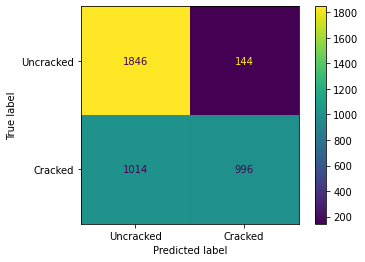

In [598]:
conFusMat = confusion_matrix(actual_labels, predicted_labels)
print(conFusMat)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conFusMat, display_labels = ["Uncracked", "Cracked"])

cm_display.plot()
plt.show()

In [599]:
print(classification_report(actual_labels, predicted_labels, target_names=["Uncracked", "Cracked"]))

              precision    recall  f1-score   support

   Uncracked       0.65      0.93      0.76      1990
     Cracked       0.87      0.50      0.63      2010

    accuracy                           0.71      4000
   macro avg       0.76      0.71      0.70      4000
weighted avg       0.76      0.71      0.70      4000



In [600]:
print(log_loss(actual_labels, predicted_labels))

9.99900455183413


In [601]:
print(roc_auc_score(actual_labels, predicted_labels))

0.7115802895072377


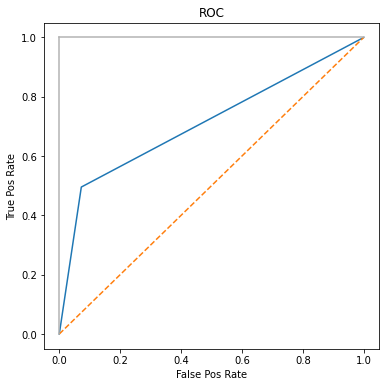

In [602]:
fpr, tpr, threshold = roc_curve(actual_labels, predicted_labels)
plt.subplots(1,figsize=(6,6))
plt.title("ROC")
plt.plot(fpr,tpr)
plt.plot([0,1], ls="--")
plt.plot([0,0], [1,0], c=".7"), plt.plot([1,1], c=".7")
plt.ylabel("True Pos Rate")
plt.xlabel("False Pos Rate")
plt.show()

# 5.5 Unsupervised learning old setup






In [ ]:
# #filter out cracked images from dataset_Decks
# test_1=np.where(dataset_Decks[:,1]==1)
# cracked_Decks_ori=dataset_Decks[test_1]

In [ ]:
# # In order to avoid using same cracked images
# # Apply flip_3 function to cracked images

# def flip_3(data):
#     flipped = np.flip(data, axis = 1) 

#     return flipped

# cracked_Decks = flip_3(cracked_Decks_ori)

In [ ]:
# image_size = 128
# k = 4
# # extract score value from model's function
# cracked_Decks_2 = get_pca_data(resize_dataset(dataset_Decks, size=image_size),k)
# cracked_Decks_score_list = []
# for input, ground_truth_label in cracked_Decks_2:
#     input = torch.Tensor(input).to(device)
#     BL_score = model(input)
#     cracked_Decks_score_list.append(BL_score.item())

# cracked_Decks_score_list

# 6 Clustering
Just cleaning up code found elsewhere

In [603]:
# def apply_pca(X, k=4):
#     pca = PCA(n_components=k)
#     X = pca.fit_transform(X)
#     print("Explained variance ratio:")
#     print(pca.explained_variance_ratio_)
#     return X

In [604]:
# OLD, uses PCA and aims to cluster based on class ID
# def prepare_data_for_clustering(dataset):
#     edge_pixels = []
#     hidden_states = []
#     labels = []
#     for input, ground_truth_label in dataset:
#         # input is 1D of size (64 * 64) binary edge matrix,
#         # same as for the model. 
        
#         # first attempt: cluster by last hidden state of model
#         # second attempt: cluster by model raw score
#         # third attempt: cluster by pixel counts in edge detection image
#         # fourth attempt: cluster by edge pixels AND model raw score
#         # fifth attempt: cluster by edge pixels and PCA on model hidden state

#         input = torch.Tensor(input).to(device)
#         normalized_score, last_hidden_state = model(input)
#         last_hidden_state = last_hidden_state.detach().numpy()
#         edge_pixel_count = input.sum().detach().numpy()
#         edge_pixels.append(edge_pixel_count)
#         hidden_states.append(last_hidden_state)
#         labels.append(ground_truth_label)
#     new_components = apply_pca(np.array(hidden_states))
#     new_data = []
#     for i in range(new_components.shape[0]):
#         # new_data.append([edge_pixels[i], new_components[i][0]])
#         new_data.append([edge_pixels[i], new_components[i][0], new_components[i][1]])
#     new_data = np.array(new_data)
#     new_data = new_data / new_data.max(axis=0)
#     return new_data, np.array(labels)

In [605]:
def prepare_data_for_clustering(dataset):
    new_data = []
    labels = []
    for input, ground_truth_label in dataset:
        input = torch.Tensor(input).to(device)
        normalized_score, raw_score = model(input)
        raw_score = raw_score.detach().numpy()
        edge_pixel_count = input.sum().detach().numpy()
        new_data.append([edge_pixel_count, raw_score])
    new_data = np.array(new_data)
    new_data = new_data / new_data.max(axis=0)
    return new_data

In [606]:
full_data = combine_dataset(training_data, val_data)
cracked_data, _ = split_by_label(full_data)
full_data = None

10000 10000


In [607]:
X = prepare_data_for_clustering(cracked_data)

<ipython-input-605-072c5408495c>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_data = np.array(new_data)


In [608]:
# i had planned to use 2 features but couldnt really come up with an appropriate second
# feature after using the model scores/hidden states didnt work out.
def visualize_unclustered_data(X):

    fig = plt.figure()
    plt.title('Visualization of Cracked Deck dataset')
    plt.xlabel("Edge Pixel Count")
    plt.ylabel("Raw Model Score")

    x = X[:, 0]
    y = X[:, 1]
          

        
    plt.scatter(x, y, c='black', marker=".")
    plt.show()

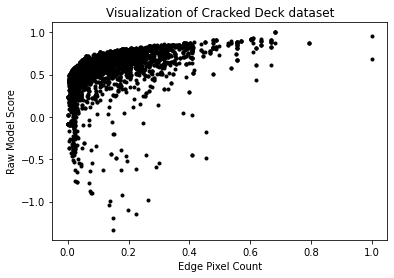

In [620]:
visualize_unclustered_data(X)
# only first 2 dimensions

In [610]:
num_clusters = 5
gmm = GaussianMixture(n_components=num_clusters)
cluster_labels = gmm.fit_predict(X)

In [611]:
def visualize_cluster_results(X, y):

    fig = plt.figure()
    plt.title('Visualization of Cracked Deck dataset by cluster')
    plt.xlabel("Edge Pixel Count")
    plt.ylabel("Raw Model Score")

    plt.scatter(X[:,0], X[:,1], c=y,cmap='copper')
    plt.show()

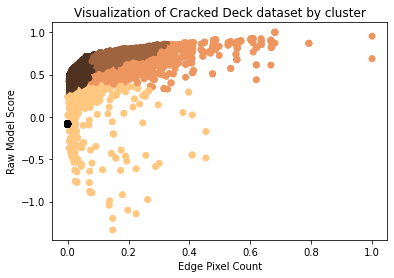

In [612]:
visualize_cluster_results(X, cluster_labels)
# only first 2 dimensions

In [613]:
print("Silhouette Score (n=" + str(num_clusters) + ")", silhouette_score(X, cluster_labels))

Silhouette Score (n=5) 0.6250872463745094


In [614]:
print("Davies-Bouldin Score (n=" + str(num_clusters) + ")", davies_bouldin_score(X, cluster_labels))

Davies-Bouldin Score (n=5) 1.6309429124955497


In [615]:
dbscan = DBSCAN(eps=0.04, min_samples=10)
cluster_labels = dbscan.fit_predict(X)

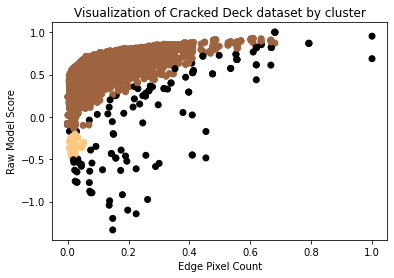

In [616]:
visualize_cluster_results(X, cluster_labels)

In [617]:
print("Silhouette Score (n=" + str(num_clusters) + ")", silhouette_score(X, cluster_labels))

Silhouette Score (n=5) 0.07080808009263143


In [618]:
print("Davies-Bouldin Score (n=" + str(num_clusters) + ")", davies_bouldin_score(X, cluster_labels))

Davies-Bouldin Score (n=5) 2.3011575318635673


In [ ]:
# conFusMat = confusion_matrix(y, cluster_labels)
# print(conFusMat)
# cm_display = ConfusionMatrixDisplay(confusion_matrix = conFusMat, display_labels = ["Uncracked", "Cracked"])

# cm_display.plot()
# plt.show()
# print(classification_report(y, cluster_labels, target_names=["Uncracked", "Cracked"]))

In [ ]:
# # Mutual Information (Normalized & Adjusted)
# # 0 to 1 (1 being Very good) 
# norMutInfo = normalized_mutual_info_score(y, cluster_labels)
# print("Normalized: ",norMutInfo)

In [ ]:
# adjMutInfo = adjusted_mutual_info_score(y, cluster_labels)
# print("Adjusted: ",adjMutInfo)

In [ ]:
# randInd = rand_score(y, cluster_labels)
# print("Rand Score: ", randInd)

In [ ]:
# homScore = homogeneity_score(y, cluster_labels)
# print("Homogeneity Score: ", homScore)

In [ ]:
# comScore = completeness_score(y, cluster_labels)
# print("Completeness Score: ", comScore)

In [ ]:
# vScore = v_measure_score(y, cluster_labels)
# print("V Measure: ",vScore)

In [ ]:
# FMS = fowlkes_mallows_score(y, cluster_labels)
# print("Fowlkes-Mallows index: ", FMS)

#7 Clustering Analysis - Based on Profs Lecture Notes on Clustering Evalution (Lec 10)



*   Listing all that is mentioned
*   ***Currently using the Classification data until Clustering Model is made***





In [ ]:
######## MODEL GOES HERE ##################

## Internal measures: derive goodness from the data itself


*   Silhouette Coefficient
*   Davies-Bouldin Index






In [ ]:
# from sklearn.cluster import KMeans
# from sklearn.cluster import GaussianMixture
# from sklearn.metrics import silhouette_score
# from sklearn.metrics import davies_bouldin_score
# from sklearn.metrics.cluster import normalized_mutual_info_score
# from sklearn.metrics.cluster import adjusted_mutual_info_score
# # TEMP K MEANS MODEl
# clustLarge, clustSma = split_dataset(resize_dataset(dataset_Decks, size=image_size), training_percent)
# num_clusters = 2
# X , y = flatten_and_split_data(clustSma)

 
#  # initialise kmeans
# kmeans = KMeans(n_clusters=num_clusters)
# cluster_pred = kmeans.fit_predict(X)
# cluster_labels = kmeans.labels_
 
# print("Silhouette Score (n=" + str(num_clusters) + ")",silhouette_score(X, cluster_labels))
# print("Davies-Bouldin Score (n=" + str(num_clusters) + ")",davies_bouldin_score(X, cluster_labels))

<ipython-input-25-0c064896ec56>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(resized_images)


Silhouette Score (n=2) 0.8035359536148418
Davies-Bouldin Score (n=2) 0.7297562000682878


## External measures: employ external ground-truth


*   Purity (aka. Precision, Recall, Accuracy and F1 Score)
*   Mutal Infromation (Normalized)
*   Rand Index
*   Homogeneity
*   Completeness
*   Fowlkes-Mallows index
*   V-measure is the harmonic mean between homogeneity and completeness:







In [ ]:
# # Purity 
# conFusMat = confusion_matrix(y, cluster_pred)
# print(conFusMat)
# cm_display = ConfusionMatrixDisplay(confusion_matrix = conFusMat, display_labels = [True, False])

# cm_display.plot()
# plt.show()
# print(classification_report(y, cluster_pred, target_names=["Uncracked", "Cracked"]))

NameError: ignored

In [ ]:
# #Mutal Infromation (Normalized & Adjusted)
# # 0 to 1 (1 being Very good) 
# from sklearn.metrics.cluster import normalized_mutual_info_score
# norMutInfo = normalized_mutual_info_score(y, cluster_pred)
# from sklearn.metrics.cluster import adjusted_mutual_info_score
# adjMutInfo = adjusted_mutual_info_score(y, cluster_pred)
# print("Normalized: ",norMutInfo)
# print("Adjusted: ",adjMutInfo)

Normalized:  0.019972685703795685
Adjusted:  0.019374717555823883


In [ ]:
# #Rand Index 
# from sklearn.metrics.cluster import rand_score
# randInd = rand_score(y, cluster_pred)
# print(randInd)

0.6760445649788683


In [ ]:
#  Homogeneity & Completeness & V Measure
# from sklearn.metrics.cluster import homogeneity_score
# from sklearn.metrics.cluster import completeness_score
# from sklearn.metrics.cluster import v_measure_score
# homScore = homogeneity_score(y, cluster_pred)
# print("Homogeneity Score: ", homScore)


# comScore = completeness_score(y, cluster_pred)
# print("Completeness Score: ", comScore)


# vScore = v_measure_score(y, cluster_pred)
# print("V Measure: ",vScore)

Homogeneity Score:  0.013996825121427787
Completeness Score:  0.03485293914963931
V Measure:  0.019972685703795682


In [ ]:
# Fowlkes-Mallows index
# from sklearn.metrics.cluster import fowlkes_mallows_score
# FMS = fowlkes_mallows_score(y, cluster_pred)
# print("Fowlkes-Mallows index: ", FMS)

Fowlkes-Mallows index:  0.8086458660708424
